In [69]:
# # linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta,date
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.metrics import r2_score,mean_squared_error

#import project datafile
df = pd.read_csv("titanic.csv")
print(df)        
           


      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

In [70]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [71]:



df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [72]:
#describe of the datafile project
df.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [73]:
#the datafile project info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 107.5+ KB


In [74]:
#list of the first ten lines of he data project file
df.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [75]:
# numbers of NaN per columns
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [76]:
# another step to clean data 
#delete the column or columns where all are NaN

df.dropna(axis = 1 , how = 'all')
#delete the rowor rows where all are NaN



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [77]:
df.dropna(axis = 0 , how = 'all')





# alook to the data file

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [78]:
# total number of NaN in the datafile

df.isnull().sum().sum()

3869

In [79]:
df.drop(df.index[1309])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [80]:

#insert values into missing ages (mean of the existant ages)
    
df['age'].fillna(df['age'].median(),inplace = True)


In [81]:
df['fare'].fillna(df['fare'].median(),inplace = True)


In [82]:
# what's the number of NaN  now ?
df.isnull().sum().sum()

3603

In [83]:
# another step to clean data 
#delete the column or columns where all are NaN

df.dropna(axis = 1 , how = 'all')
#delete the rowor rows where all are NaN

df.dropna(axis = 0 , how = 'all')
# alook to the data file
print (df)
# alook to the total NaN number 
df.isnull().sum().sum()

      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

3603

In [84]:
# another clean delete lines where there >=7  NaN
df.dropna(thresh=7)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


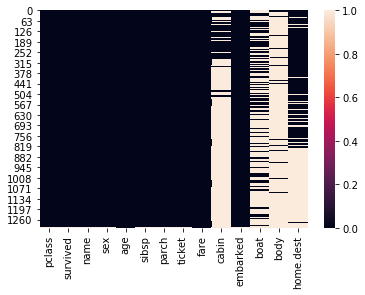

In [85]:
# just a previsualisation for me before (the real after all cleanings)

sns.heatmap(df.isna())

In [86]:
df.dropna(axis=0,how='all',inplace=True)



In [87]:
df.dropna(axis=1,how='all',inplace=True)

In [88]:
df['age'].fillna(df['age'].median(),inplace=True)


In [89]:
df['fare'].fillna(df['fare'].median(),inplace=True)



In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1310 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1310 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 117.7+ KB


In [91]:
df.isnull().sum().sum()

3603

In [92]:
df["sex"].sum


<bound method Series.sum of 0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object>

In [93]:
df['fare'].fillna(df['fare'].median(),inplace=True)

df["cabin"].fillna("99",inplace=True)

df["boat"].fillna("99",inplace=True)
df["home.dest"].fillna("99",inplace=True)





 

In [94]:
df["body"].fillna("99",inplace=True)

In [95]:
# Converting the Embarked Column
df["embarked"] = df["embarked"].fillna("S")
df.loc[df["embarked"] == "S", "embarked"] = 0
df.loc[df["embarked"] == "C", "embarked"] = 1
df.loc[df["embarked"] == "Q", "embarked"] = 2



In [96]:
# another clean delete lines where there >=7  NaN
df.dropna(thresh=7)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,0,2,99,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,0,11,99,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,0,99,99,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,0,99,135,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,0,99,99,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,2665,14.4542,99,1,99,99,99
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,99,1,99,304,99
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,99,1,99,99,99
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,99,0,99,99,99


In [97]:
df.isnull().sum().sum()

7

In [98]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0,1.0,0.0,2665,14.4542,99,1,99,99,99
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,99,1,99,304,99
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,99,1,99,99,99
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,99,0,99,99,99
1309,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,14.4542,99,0,99,99,99


In [99]:
df= df.drop(df.index[1309])

In [100]:
# to make numbers more easy i make a round of the datafile
#because it's not very important IN THIS CASE to have more decimals 

df.round(0)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.0,B5,0,2,99,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,1.0,1.0,2.0,113781,152.0,C22 C26,0,11,99,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,152.0,C22 C26,0,99,99,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,152.0,C22 C26,0,99,135,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,152.0,C22 C26,0,99,99,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.0,1.0,0.0,2665,14.0,99,1,99,328,99
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0,1.0,0.0,2665,14.0,99,1,99,99,99
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.0,0.0,0.0,2656,7.0,99,1,99,304,99
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.0,99,1,99,99,99


In [101]:
df.isnull().sum().sum()

0

In [102]:
df_new = df

In [103]:
df.shape

(1309, 14)

In [104]:
# another step of preprocessing 
# use of  tools to get in the data file project only numbers 
# import of Algorithms

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['cabin']= encoder.fit_transform (df['cabin'])

df['embarked']= encoder.fit_transform (df['embarked'])
df['boat']= encoder.fit_transform (df['boat'])
df['sex']= encoder.fit_transform (df['sex'])
df['home.dest']= encoder.fit_transform (df['home.dest'])
df['age']= encoder.fit_transform (df['age'])

df['home.dest']= encoder.fit_transform (df['home.dest'])


In [105]:
 Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


print(Title_Dictionary)
     






{'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Jonkheer': 'Royalty', 'Don': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Mme': 'Miss', 'Mlle': 'Miss', 'Miss': 'Miss', 'Ms': 'Mrs', 'Mr': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Master'}


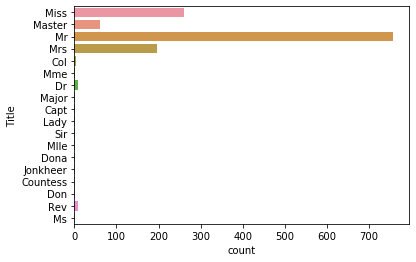

In [106]:
df['Title'] = df.name.str.extract('([A-Za-z]+)\.',expand=False)

sns.countplot(y='Title',data=df)  

In [107]:
df['Title'].replace(Title_Dictionary,inplace=True )




In [108]:

df['Title'] = df['Title'].map({'Miss':1,'Master':2,'Mrs':3 ,'Officer':4,'Royalty':5, 'Countess':0})

In [109]:
# Converting the Sex Column to numeric value
df.loc[df["sex"] == "male", "sex"] = 0
df.loc[df["sex"] == "female", "sex"] = 1


In [110]:
# Converting the Embarked Column
df["embarked"] = df["embarked"].fillna("S")
df.loc[df["embarked"] == "S", "embarked"] = 0
df.loc[df["embarked"] == "C", "embarked"] = 1
df.loc[df["embarked"] == "Q", "embarked"] = 2



In [111]:

labels = ["Child","Adult","Middle Aged", "Over 60"]
edges = [0,18,40,60, 120]
age_categories =  pd.cut(df["age"], edges, labels=labels)

print (age_categories[0:10]),

df['age_categories']= age_categories



0    Middle Aged
1          Child
2          Child
3    Middle Aged
4          Adult
5        Over 60
6        Over 60
7    Middle Aged
8        Over 60
9        Over 60
Name: age, dtype: category
Categories (4, object): [Child < Adult < Middle Aged < Over 60]


In [112]:
df["embarked"] = df["embarked"].fillna("S")
df.loc[df["survived"] == "S", "embarked"] = 0
df.loc[df["embarked"] == "C", "embarked"] = 1
df.loc[df["embarked"] == "Q", "embarked"] = 2

In [113]:
df['age']= df['age_categories']

df['age_categories'] = df['age_categories'].map({'Child':1,'Adult':2,'Middle Aged':3 ,'Over 60':4})

In [114]:
df["FamilySize"]=df["sibsp"]+1+df["parch"]

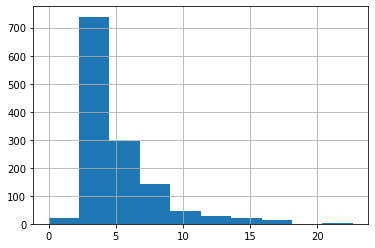

In [115]:
#outliers
import numpy as np
np.sqrt(df.fare).hist()

{'whiskers': [<matplotlib.lines.Line2D at 0xe48b1b0>,
 'caps': [<matplotlib.lines.Line2D at 0xe48b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe48b190>],
 'medians': [<matplotlib.lines.Line2D at 0xe48bcb0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe48bf30>],
 'means': []}

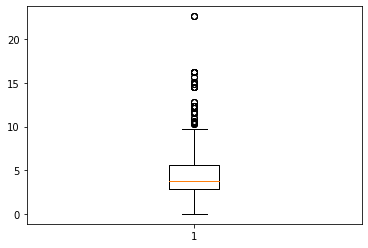

In [116]:
#outliers
df.fare=np.sqrt(df.fare)

from matplotlib import pyplot as pt
pt.boxplot(df.fare,showfliers=True)

{'whiskers': [<matplotlib.lines.Line2D at 0xe4bfaf0>,
 'caps': [<matplotlib.lines.Line2D at 0xe4cc470>,
 'boxes': [<matplotlib.lines.Line2D at 0xe4bfc10>],
 'medians': [<matplotlib.lines.Line2D at 0xe4cc990>],
 'fliers': [<matplotlib.lines.Line2D at 0xe4ccbb0>],
 'means': []}

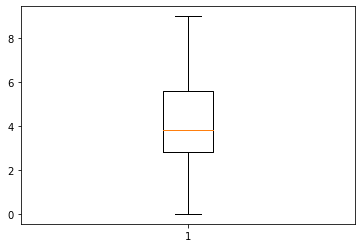

In [117]:


df.loc[df.fare>9,"fare"]=9

from matplotlib import pyplot as pt
pt.boxplot(df.fare,showfliers=True)

In [118]:
# logistic regression preparation
print ('pc class unique :')
print(df['pclass'].unique())

print ('sex :')
print(df['sex'].unique())
print ('age :')
print(df['age'].unique())

print ('sibsp :')
print(df['sibsp'].unique())

print ('parch :')
print(df['parch'].unique())
print ('fare:')
print(df['fare'].unique())

print ('cabin :')
print(df['cabin'].unique())

print ('embarked:')
print(df['embarked'].unique())

print ('boat:')
print(df['boat'].unique())

print ('body:')
print(df['body'].unique())
print ('home.dest:')
print(df['home.dest'].unique())
print ('Title:')
print(df['Title'].unique())


print ('FamilySize:')
print(df['FamilySize'].unique())

pc class unique :
[1. 2. 3.]
sex :
[0 1]
age :
[Middle Aged, Child, Adult, Over 60, NaN]
Categories (4, object): [Child < Adult < Middle Aged < Over 60]
sibsp :
[0. 1. 2. 3. 4. 5. 8.]
parch :
[0. 2. 1. 4. 3. 5. 6. 9.]
fare:
[9.         5.15266921 8.82939975 0.         7.1749007  7.03592211
 8.32466216 8.87975225 5.47722558 5.09165985 8.73451201 8.67419737
 7.24942756 5.09901951 5.95818764 5.56776436 7.41619849 5.52268051
 7.10603968 6.29285309 5.26505461 5.1271337  5.23887392 2.23606798
 6.86294397 7.82144488 7.28697468 5.44977064 7.21110255 5.05840884
 5.06951674 8.42614977 8.4429438  7.54983444 7.54514413 8.8468469
 5.62842784 5.62879206 5.13687648 5.26782688 7.03562364 8.89943818
 6.20483682 7.70713955 5.8867818  5.33853913 7.95979271 7.44591834
 8.75952053 6.51152824 6.51920241 7.20156233 7.07106781 7.6144074
 5.54037905 8.94427191 5.35840461 5.09207227 6.27694193 6.74536878
 7.59934208 5.1267241  5.07362789 7.87268696 8.16088231 6.33442973
 7.47663026 7.74596669 5.68513852 8.92468

In [119]:
df['survived'].unique()

array([1., 0.])

In [120]:
df['age'].isnull().sum()

1

In [121]:
df['age'].fillna('Child',inplace=True)


In [122]:
df['fare'].unique()

array([9.        , 5.15266921, 8.82939975, 0.        , 7.1749007 ,
       7.03592211, 8.32466216, 8.87975225, 5.47722558, 5.09165985,
       8.73451201, 8.67419737, 7.24942756, 5.09901951, 5.95818764,
       5.56776436, 7.41619849, 5.52268051, 7.10603968, 6.29285309,
       5.26505461, 5.1271337 , 5.23887392, 2.23606798, 6.86294397,
       7.82144488, 7.28697468, 5.44977064, 7.21110255, 5.05840884,
       5.06951674, 8.42614977, 8.4429438 , 7.54983444, 7.54514413,
       8.8468469 , 5.62842784, 5.62879206, 5.13687648, 5.26782688,
       7.03562364, 8.89943818, 6.20483682, 7.70713955, 5.8867818 ,
       5.33853913, 7.95979271, 7.44591834, 8.75952053, 6.51152824,
       6.51920241, 7.20156233, 7.07106781, 7.6144074 , 5.54037905,
       8.94427191, 5.35840461, 5.09207227, 6.27694193, 6.74536878,
       7.59934208, 5.1267241 , 5.07362789, 7.87268696, 8.16088231,
       6.33442973, 7.47663026, 7.74596669, 5.68513852, 8.92468487,
       5.34205017, 5.78791845, 5.83273521, 8.67467579, 8.79133

In [123]:
df['sibsp'].unique()




array([0., 1., 2., 3., 4., 5., 8.])

In [124]:
df['parch'].unique()

array([0., 2., 1., 4., 3., 5., 6., 9.])

In [125]:
df['embarked'].values[:66]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [126]:
df['pclass'].unique()

array([1., 2., 3.])

In [127]:
df['age_categories'].unique()


[3, 1, 2, 4, NaN]
Categories (4, int64): [1 < 2 < 3 < 4]

In [128]:
df['age_categories'].describe()

count     1308
unique       4
top          3
freq       608
Name: age_categories, dtype: int64

In [129]:

df['age_categories'].fillna( 1 ,inplace = True)
df['age_categories'].isnull().sum()

0

In [130]:
df['survived'].unique()


array([1., 0.])

In [131]:
df.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat              0
body              0
home.dest         0
Title             0
age_categories    0
FamilySize        0
dtype: int64

In [132]:
df['age'].isnull().sum()

0

In [133]:



df.tail()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,age_categories,FamilySize
1304,3.0,0.0,"Zabour, Miss. Hileni",0,Adult,1.0,0.0,2665,3.801868,0,1,22,328,0,1,2,2.0
1305,3.0,0.0,"Zabour, Miss. Thamine",0,Middle Aged,1.0,0.0,2665,3.801868,0,1,22,99,0,1,3,2.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",1,Adult,0.0,0.0,2656,2.687936,0,1,22,304,0,3,2,1.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",1,Middle Aged,0.0,0.0,2670,2.687936,0,1,22,99,0,3,3,1.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",1,Middle Aged,0.0,0.0,315082,2.806243,0,0,22,99,0,3,3,1.0


In [134]:
df['survived'].unique()


array([1., 0.])

In [135]:
X= df[['age_categories','sibsp','sex','embarked','FamilySize','embarked' ,'sibsp','parch' ,'pclass' ]]

y = df["survived"]

In [136]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=90)

logreg = LogisticRegression()    
logreg.fit(X_train,y_train)

y_pred = logreg.predict (X_test)

print('Accuracy = {:.2f}'.format(logreg.score(X_test,y_test)))



Accuracy = 0.77


In [138]:

#Confusion Matrix

confusion_matrix = pd.crosstab(y_test,y_pred,rownames = ['Actual'],colnames = ['Predicted'])
print (confusion_matrix)




Predicted  0.0  1.0
Actual             
0.0        284   44
1.0         75  121


In [139]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       328
         1.0       0.73      0.62      0.67       196

    accuracy                           0.77       524
   macro avg       0.76      0.74      0.75       524
weighted avg       0.77      0.77      0.77       524



In [140]:

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
  
  



AUC: 0.82


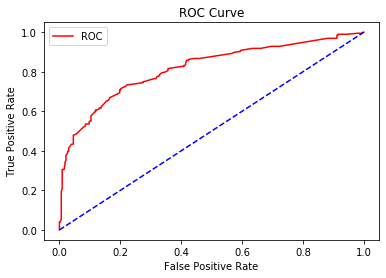

In [141]:
probs = logreg.predict_proba(X_test)  
    
probs = probs[:, 1]
auc   = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)